electron loose ID was used to select electron candidate.
One of the subID is **missing hits** criteria.
Compare the effect before and after ignore this.

* before - src/FireROOT/Analysis/python/outputs/rootfiles/modules/signalLjEfficiency__mXX-500_lxy-300.root
* after - src/FireROOT/Analysis/python/outputs/rootfiles/modules/signalLjEfficiency_modifiedElectronID__mXX-500_lxy-300.root

In [1]:
from rootpy.io import root_open
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend
import ROOT

import os
from FireROOT.Analysis.Utils import *

Welcome to JupyROOT 6.12/07


In [2]:
CMSSW_BASE = os.getenv('CMSSW_BASE')
oldfn = os.path.join(CMSSW_BASE, 'src/FireROOT/Analysis/python/outputs/rootfiles/modules/signalLjEfficiency__mXX-500_lxy-300.root')
oldd = root_open(oldfn).ch2mu2e.sig

newfn = os.path.join(CMSSW_BASE, 'src/FireROOT/Analysis/python/outputs/rootfiles/modules/signalLjEfficiency_modifiedElectronID__mXX-500_lxy-300.root')
newd = root_open(newfn).ch2mu2e.sig

In [3]:
set_style(MyStyle())
canvas = Canvas()

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


In [4]:
sample_names = [k.name for k in oldd.keys()]
sample_names.sort(key=lambda x: float(x.split('mA-')[1].split('_')[0].replace('p', '.')))

In [5]:
def get_efficiency_graphs(d):
    efficiency_graphs = []
    for s in sample_names:
        sample_dir = getattr(d, s)
        numer_ = getattr(sample_dir, 'lxyDpToEl__match').clone()
        denom_ = getattr(sample_dir, 'lxyDpToEl__total').clone()
        g = Efficiency(numer_, denom_).graph
        efficiency_graphs.append(g)
    return efficiency_graphs

In [6]:
efficiency_graphs_old = get_efficiency_graphs(oldd)
efficiency_graphs_new = get_efficiency_graphs(newd)

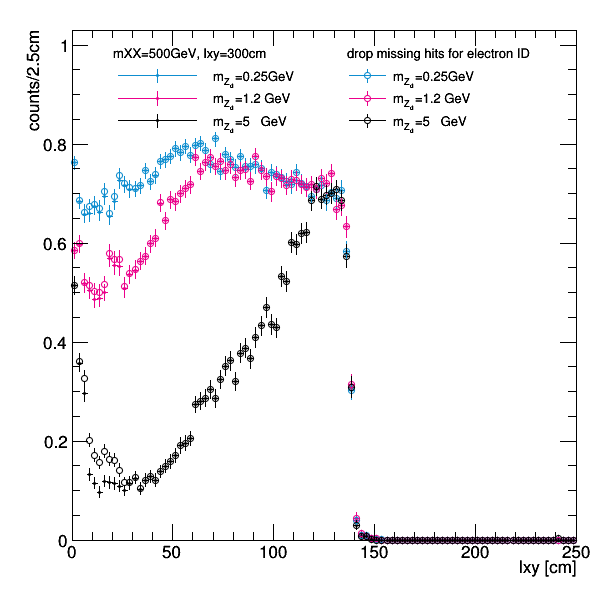

In [7]:
canvas.clear()

for i, g in enumerate(efficiency_graphs_old):
    g.markercolor = sigCOLORS[i]
    g.markersize = 0.3
    g.linecolor = sigCOLORS[i]
    g.legendstyle = 'LEP'
    if i==0: g.drawstyle = 'APZ'
    else:    g.drawstyle = 'PZ'

for i, g in enumerate(efficiency_graphs_new):
    g.markercolor = sigCOLORS[i]
    g.markersize = 0.75
    g.markerstyle = 'opencircle'
    g.linecolor = sigCOLORS[i]
    g.linestyle = 'solid'
    g.legendcolor = 'LEP'
    g.drawstyle = 'PZ'
        
draw(efficiency_graphs_old[:]+efficiency_graphs_new[:], pad=canvas)
leg = Legend(len(efficiency_graphs_old), margin=0.25, leftmargin=0.05,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,
             header='mXX=500GeV, lxy=300cm')
leg.AddEntry(efficiency_graphs_old[0], 'm_{Z_{d}}=0.25GeV')
leg.AddEntry(efficiency_graphs_old[1], 'm_{Z_{d}}=1.2 GeV')
leg.AddEntry(efficiency_graphs_old[2], 'm_{Z_{d}}=5   GeV')
leg.Draw()

leg2 = Legend(len(efficiency_graphs_new), margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,
             header='drop missing hits for electron ID')
leg2.AddEntry(efficiency_graphs_new[0], 'm_{Z_{d}}=0.25GeV', style='LEP')
leg2.AddEntry(efficiency_graphs_new[1], 'm_{Z_{d}}=1.2 GeV', style='LEP')
leg2.AddEntry(efficiency_graphs_new[2], 'm_{Z_{d}}=5   GeV', style='LEP')
leg2.Draw()

canvas.Draw()

In [8]:
def get_efficiencies(d):
    efficiencies = []
    for s in sample_names:
        sample_dir = getattr(d, s)
        numer_ = getattr(sample_dir, 'lxyDpToEl__match').clone()
        denom_ = getattr(sample_dir, 'lxyDpToEl__total').clone()
        e = Efficiency(numer_, denom_)
        efficiencies.append(e)
    return efficiencies

In [9]:
efficiency_old = get_efficiencies(oldd)
efficiency_new = get_efficiencies(newd)

In [10]:
import pandas as pd

In [11]:
for e_old, e_new in zip(efficiency_old, efficiency_new):
    data = {'old':{}, 'new':{}}
    data['old']['efficiency'] = '%.2f%%' % ( e_old.overall_efficiency()[0]*100 )
    data['old']['total'] = int(e_old.total.integral())
    data['old']['passed'] = int(e_old.passed.integral())
    
    data['new']['efficiency'] = '%.2f%%' % (e_new.overall_efficiency()[0]*100)
    data['new']['total'] = int(e_new.total.integral())
    data['new']['passed'] = int(e_new.passed.integral())
    
    df = pd.DataFrame(data).T
    print df
    
#     print 'total efficiency: %.2f%%, %.2f%%' % (e_old.overall_efficiency()[0]*100, e_new.overall_efficiency()[0]*100)
#     print 'total: ', e_old.total.integral(), e_new.total.integral()
#     print 'passed: ', e_old.passed.integral(), e_new.passed.integral()

    efficiency passed  total
new     50.38%  33321  66133
old     50.26%  33240  66133
    efficiency passed  total
new     45.12%  28011  62086
old     44.97%  27921  62086
    efficiency passed  total
new     22.72%  13629  59997
old     22.08%  13250  59997


In [45]:
e_new.overall_efficiency()[0]*100

22.716135806790337